# Airline Satisfaction Prediction

## PROBLEM STATEMENT
Predicting customer satisfaction based on their holistic experience while traveling by air.

## PROJECT OUTCOME
For this project, we intend to explore survey results provided by passengers (anonymized), and understand what causes them to be satisfied or dissatisfied. Ultimately, we hope our findings enable us to make recommendations on how to address the factors that cause dissatisfaction.

## BUSINESS IMPACT
Airline businesses around the world are decimated by Covid-19 as most international air travel has been grounded. In fact, some airlines such as Thai Airways have already filed for bankruptcy. Nonetheless, once the storm is over, demand for air travel is expected to surge as people rush back for overseas holidays. What can airlines prepare to give themselves a competitive edge when the crowd finally arrives? Customer satisfaction is always top of mind for airlines. Unhappy or disengaged customers naturally mean fewer passengers and less revenue. It’s important that customers have an excellent experience every time they travel. On-time flights, good in-flight entertainment, more (and better) snacks, and more legroom might be the obvious contributors to a good experience and more loyalty. While we might hear about those aspects the most, the customer experience is not about just the flight itself. It’s everything from purchasing the ticket on the company’s website or mobile app to checking bags in at the airport or via a mobile app to waiting in the terminal. This mindset has been, and continues to be, adapted to the post-security, onboard, and post-flight experience. So how can we determine which of these factors contribute to the satisfaction of the customer? To answer this, we intend on building a classification problem to predict the customer satisfactio

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.api import OLS
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier

## Dataset

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Understanding

In [4]:
df.shape

(103904, 25)

In [5]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
x=df.drop('satisfaction',1)
y=df['satisfaction']

In [7]:
data=df

In [8]:
le=LabelEncoder()

In [9]:
df.select_dtypes(include=np.object).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [10]:
df['Gender']=le.fit_transform(df['Gender'])
df['Customer Type']=le.fit_transform(df['Customer Type'])
df['Type of Travel']=le.fit_transform(df['Type of Travel'])
df['Class']=le.fit_transform(df['Class'])
df['satisfaction']=le.fit_transform(df['satisfaction'])

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Null Values

In [11]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [12]:
df[df['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,0,0,38,0,1,109,5,3,...,5,5,2,4,1,1,5,31,NaN,1
1124,1124,73442,1,0,53,1,1,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,0
1529,1529,71178,1,0,39,0,0,733,2,5,...,2,2,2,2,2,2,3,11,NaN,0
2004,2004,72940,0,1,26,0,0,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,0
2108,2108,116374,0,0,24,1,1,417,2,1,...,5,1,4,2,1,2,5,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,102067,36729,1,0,49,1,2,1249,2,5,...,3,4,5,4,3,4,3,230,NaN,0
102384,102384,71241,1,0,58,0,1,733,3,3,...,3,3,1,2,4,2,3,55,NaN,0
102552,102552,27684,0,1,29,0,1,1107,2,1,...,5,4,1,5,5,3,5,0,NaN,0
102960,102960,36787,1,0,58,0,1,1088,4,4,...,5,1,5,5,5,3,5,0,NaN,1


In [13]:
df.dropna(inplace=True)
df.shape

(103594, 25)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

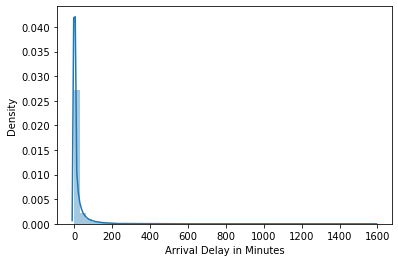

In [14]:
sns.distplot(df['Arrival Delay in Minutes'])

## Data Preparation

In [46]:
x=df.drop(['satisfaction','Unnamed: 0','id'],1)
y=df.satisfaction
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [50]:
s=StandardScaler().fit(xtrain)

xstrain=s.fit_transform(xtrain)
xstest=s.transform(xtest)

In [48]:
xstrain=sm.add_constant(xstrain)

In [52]:
xstrain

array([[ 1.01427993, -0.47438099,  0.97195618, ...,  1.3042827 ,
        -0.38856674, -0.39391025],
       [-0.98592112, -0.47438099, -1.74390777, ...,  1.3042827 ,
        -0.36222027, -0.39391025],
       [-0.98592112, -0.47438099, -1.14774251, ...,  0.54257491,
        -0.38856674, -0.39391025],
       ...,
       [ 1.01427993, -0.47438099,  1.43564027, ..., -0.21913288,
        -0.38856674, -0.39391025],
       [ 1.01427993, -0.47438099,  1.30315911, ..., -0.21913288,
        -0.38856674, -0.39391025],
       [-0.98592112, -0.47438099, -0.61781784, ...,  1.3042827 ,
        -0.38856674, -0.39391025]])

## Base Model

### Logistic Regression

In [54]:
base_model=sm.Logit(ytrain,xstrain).fit()

Optimization terminated successfully.
         Current function value: 0.348145
         Iterations 7


In [55]:
print(base_model.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                82875
Model:                          Logit   Df Residuals:                    82853
Method:                           MLE   Df Model:                           21
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.4911
Time:                        14:56:37   Log-Likelihood:                -28853.
converged:                       True   LL-Null:                       -56698.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0277      0.011      2.609      0.009       0.007       0.049
x2            -0.8301      0.012    -67.294      0.000      -0.854      -0.806
x3            -0.1235      0.011    -10.882      0.0

In [33]:
from sklearn.metrics import classification_report

In [56]:
def cfm(model):
    ypred=model.predict(xstest)
    ypred=[1 if i>=0.5 else 0 for i in ypred]
    ypred1=model.predict(xstrain)
    ypred1=[1 if i>=0.5 else 0 for i in ypred1]    
    print('TEST')
    print(classification_report(ytest,ypred))
    print()
    print('TRAIN')
    print(classification_report(ytrain,ypred1))    

In [42]:
xstest.shape

(20719, 24)

In [57]:
cfm(base_model)

TEST
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     11707
           1       0.82      0.87      0.84      9012

    accuracy                           0.86     20719
   macro avg       0.86      0.86      0.86     20719
weighted avg       0.86      0.86      0.86     20719


TRAIN
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     46990
           1       0.82      0.87      0.84     35885

    accuracy                           0.86     82875
   macro avg       0.86      0.86      0.86     82875
weighted avg       0.86      0.86      0.86     82875



In [ ]:
ypredt=logreg.predict(xtrain)
fpr,tpr,threshold=roc_curve(ytrain,ypredt)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
roc_auc_score(ytrain,ypredt)

### Random Forest

In [18]:
rf=RandomForestClassifier()

In [19]:
rf.fit(xstrain,ytrain)

RandomForestClassifier()

In [20]:
ypred=rf.predict(xstrain)

In [21]:
accuracy_score(ypred,ytrain)

1.0

In [22]:
cm=confusion_matrix(ypred,ytrain)
cm

array([[46990,     0],
       [    0, 35885]], dtype=int64)

The Model seems overfitted

### KMeans

In [23]:
from sklearn.cluster import KMeans

In [24]:
km=KMeans(n_clusters=2)

In [25]:
ypred=km.fit_predict(xstrain)

In [26]:
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
accuracy_score(ypred,ytrain)

0.2399396681749623

In [28]:
cm=confusion_matrix(ypred,ytrain)

In [29]:
cm

array([[13535, 29535],
       [33455,  6350]], dtype=int64)

## Improvising the Base Model

In [58]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [61]:
algo=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
for i in algo:
    i.fit(xtrain,ytrain)
    print(str(i).upper())
    cfm(i)
    print('='*60)
    print()

KNEIGHBORSCLASSIFIER()
TEST
              precision    recall  f1-score   support

           0       0.57      1.00      0.72     11707
           1       0.00      0.00      0.00      9012

    accuracy                           0.57     20719
   macro avg       0.28      0.50      0.36     20719
weighted avg       0.32      0.57      0.41     20719


TRAIN
              precision    recall  f1-score   support

           0       0.57      1.00      0.72     46990
           1       0.00      0.00      0.00     35885

    accuracy                           0.57     82875
   macro avg       0.28      0.50      0.36     82875
weighted avg       0.32      0.57      0.41     82875


DECISIONTREECLASSIFIER()
TEST
              precision    recall  f1-score   support

           0       0.58      0.87      0.70     11707
           1       0.51      0.18      0.26      9012

    accuracy                           0.57     20719
   macro avg       0.55      0.52      0.48     20719
weighted

We procede with Decision Tree Classifier

### Improvising the Decision Tree Classifier

In [69]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            'min_samples_leaf': [5,8,10,15,20]}
model = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
model.fit(xstrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_leaf': [5, 8, 10, 15, 20]})

In [70]:
model.best_params_

{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 15}

In [73]:
DT=DecisionTreeClassifier(criterion= 'gini', max_depth= 50, min_samples_leaf=15)
final_model=DT.fit(xstrain,ytrain)
cfm(final_model)

TEST
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11707
           1       0.95      0.93      0.94      9012

    accuracy                           0.95     20719
   macro avg       0.95      0.95      0.95     20719
weighted avg       0.95      0.95      0.95     20719


TRAIN
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     46990
           1       0.97      0.95      0.96     35885

    accuracy                           0.96     82875
   macro avg       0.97      0.96      0.96     82875
weighted avg       0.96      0.96      0.96     82875



We get excellent resunts wit 95% accuracy on test data

## Feature Importance

In [74]:
imp_features = pd.DataFrame({'Features':xtrain.columns,
                            'Importances':final_model.feature_importances_})
imp_features = imp_features.sort_values(by = 'Importances',ascending = False).reset_index(drop = True)

<AxesSubplot:xlabel='Importances', ylabel='Features'>

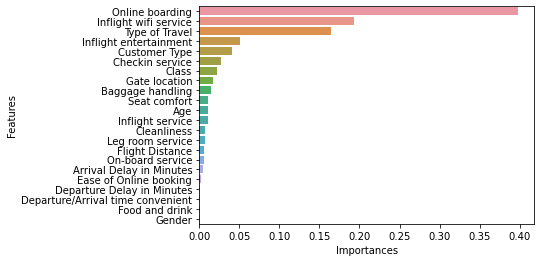

In [75]:
sns.barplot(data = imp_features,x = 'Importances',y ='Features')

The above are the important features